# Your First Neural Network

🎯 Goals of this challenge:
- Writing the architecture of a Neural Network
- Inspect some of the most important hyperparameters of a Neural Network

🌗 In this challenge, we will be working with the **moons dataset**. 
* Your goal is to build a Neural Network which separates two classes. 
* Each data point $X$ has two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or the class 1
* These bi-dimensional points can be represented on a 2D-scatterplot, using colors to represent to two available classes $\color{blue}{blue}$ and $\color{red}{red} $
* Here is an example of such a moon dataset:

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/moons_dataset.png" />

## (1)  Generating the Moons dataset

📚 Here, we will use the Scikit-Learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. 

👉 Each moon corresponds to a class.

In [157]:
from sklearn.datasets import make_moons

### Generating the moons dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

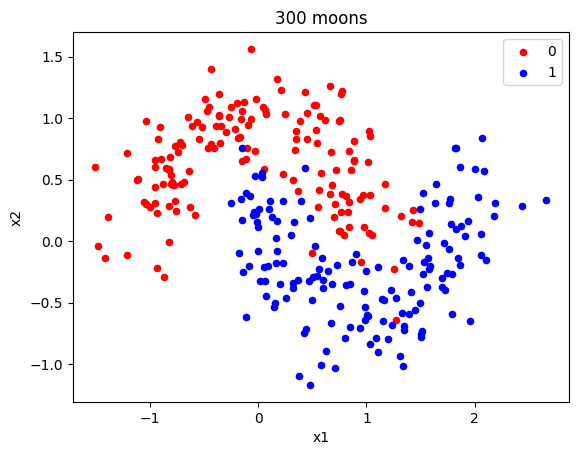

In [158]:
### This function allows to plot the two moons

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
        
    
    plt.title(f"{len(X)} moons")
    plt.show()

plot_moons(X, y)

❓  Play with the number of samples and the noise to discover the effects on the `moons dataset` ❓

🎨 Plot the moons for different values.

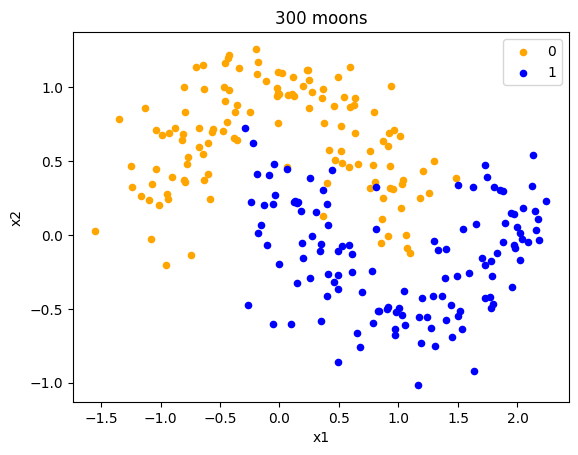

In [159]:
X1, y1 = make_moons(n_samples=250, noise=0.2, random_state=0)

def plot_moons(X1, y1):
    df = pd.DataFrame(dict(x1=X1[:,0], x2=X1[:,1], label=y1))
    colors = {0:'orange', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
        
    
    plt.title(f"{len(X)} moons")
    plt.show()


plot_moons(X1, y1)

❓ Create 250 samples of the data with ❓
* a noise equal to 0.20
* a random state equal to 0 to get the same results every time you re-run the notebook
* and split the initial dataset into a train and test set (size: 70/30%) 

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

## (2) Designing a basic Neural Network  for a binary classification task

🧠 You will now define your first neural network.
The architecture of your model should have: 
- a first layer with:
    - 5 neurons
    - a _relu_ activation function 
    - the correct input dimension
- an output layer suited to your binary classification task.


❓ Complete the next function with the previous architecture ❓

In [161]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(5, activation='relu', input_dim=2))
model.add(layers.Dense(1, activation='sigmoid')) 

In [162]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    #############################    
    
    model = models.Sequential()
    model.add(layers.Dense(5, activation='relu', input_dim=2))
    model.add(layers.Dense(1, activation='sigmoid')) 
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model()

---

<details>
    <summary><i>Intuitions about the optimization method</i></summary>

We'll keep this message short as you have a full course 📆 **Deep Learning - Optimizers, Loss, Fitting** coming soon.
    
So, briefly speaking:
    
- the ***.compile()*** tells your algorithm how to optimize the weights of your network when fitting the network on real data
    - the ***binary_crossentropy*** is the "log-loss" that you have already seen in Machine Learning in the context of a Logistic Regression for classification
    - To date, the ***adam*** optimizer is the gold standard in Deep Learning - an optimizer in Deep Learning is like a solver in Machine Learning: it provides an iterative method to minimize the loss function of an algorithm with respect to its parameters
    
</details>

---



❓ How many parameters does the model have?  ❓

<details>
    <summary><i>Hint</i></summary>

The `.summary()`method displays:
   - the stack of layers of your Neural Network
   - the output shape after each layer
   - the number of parameters for each layer (and consequently the total number of parameters)
    
</details>


In [163]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 5)                 15        
                                                                 
 dense_63 (Dense)            (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [164]:
params_num = (2+1)*5 + (5+1)*1
params_num

21

## (3) Training your Neural Network

❓You are now ready to train your algorithm. 

Let's go! Initialize your model and fit it on the training set using `100 epochs`! 

Store the results of the training into a `history` variable. ❓

In [165]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 1ms/step - loss: 0.8388 - accuracy: 0.2400
Epoch 2/100
6/6 [==============================] - 0s 1ms/step - loss: 0.8315 - accuracy: 0.2400
Epoch 3/100
6/6 [==============================] - 0s 1ms/step - loss: 0.8247 - accuracy: 0.2400
Epoch 4/100
6/6 [==============================] - 0s 1ms/step - loss: 0.8182 - accuracy: 0.2286
Epoch 5/100
6/6 [==============================] - 0s 1ms/step - loss: 0.8115 - accuracy: 0.2286
Epoch 6/100
6/6 [==============================] - 0s 1ms/step - loss: 0.8057 - accuracy: 0.2286
Epoch 7/100
6/6 [==============================] - 0s 1ms/step - loss: 0.7997 - accuracy: 0.2343
Epoch 8/100
6/6 [==============================] - 0s 1ms/step - loss: 0.7943 - accuracy: 0.2514
Epoch 9/100
6/6 [==============================] - 0s 1ms/step - loss: 0.7885 - accuracy: 0.2514
Epoch 10/100
6/6 [==============================] - 0s 1ms/step - loss: 0.7828 - accuracy: 0.2571
Epoch 11/100
6/6 [===========

6/6 [==============================] - 0s 883us/step - loss: 0.5485 - accuracy: 0.7886
Epoch 85/100
6/6 [==============================] - 0s 1ms/step - loss: 0.5465 - accuracy: 0.8000
Epoch 86/100
6/6 [==============================] - 0s 995us/step - loss: 0.5443 - accuracy: 0.8000
Epoch 87/100
6/6 [==============================] - 0s 1ms/step - loss: 0.5422 - accuracy: 0.8000
Epoch 88/100
6/6 [==============================] - 0s 944us/step - loss: 0.5401 - accuracy: 0.8114
Epoch 89/100
6/6 [==============================] - 0s 1ms/step - loss: 0.5380 - accuracy: 0.8171
Epoch 90/100
6/6 [==============================] - 0s 1ms/step - loss: 0.5359 - accuracy: 0.8229
Epoch 91/100
6/6 [==============================] - 0s 947us/step - loss: 0.5340 - accuracy: 0.8286
Epoch 92/100
6/6 [==============================] - 0s 1ms/step - loss: 0.5318 - accuracy: 0.8343
Epoch 93/100
6/6 [==============================] - 0s 937us/step - loss: 0.5298 - accuracy: 0.8343
Epoch 94/100
6/6 [=====

👀 `history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will notice that you have access to epoch-by-epoch information stored in `history.history`

In [166]:
history.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x7b9d931f7f40>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.8387547731399536,
   0.8314833045005798,
   0.824663519859314,
   0.8181504011154175,
   0.8115231990814209,
   0.8056744337081909,
   0.7997362613677979,
   0.7942744493484497,
   0.7884543538093567,
   0.7828230261802673,
   0.7775589227676392,
   0.772490918636322,
   0.767341673374176,
   0.7622763514518738,
   0.7574144005775452,
   0.7526465654373169,
   0.7476867437362671,
   0.7431086897850037,
   0.7384728193283081,
   0.7340615391731262,
   0.7298676371574402,
   0.7254250645637512,
   0.7212589979171753,
   0.716881275177002,
   0.7127658724784851,
   0.7088223099708557,
   0.7049936056137085,
   0.7010462880134583,
   0.6973437666893005,
   0.6937553286552429,
   0.6901193857192993,
   0.6866206526756287,
   0.6831295490264893,
   0.679574728012085,
   0.6763008832931519,
   0.6729811429977417,
   0.669

❓ Plot the history of the train loss using the following function ❓

In [167]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

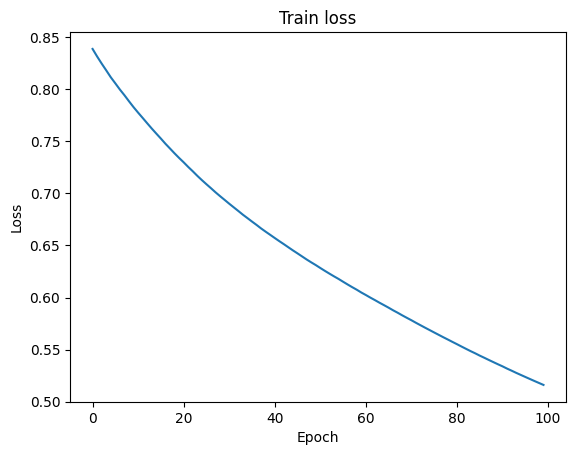

In [168]:
plot_history(history)

❓ What do you observe ❓

> YOUR ANSWER HERE

❗️ <u>Evaluation on unseen data</u> ❗️

🧑🏻‍🏫 A Deep Learning Model is like any other Machine Learning model. Once you've trained it on the training set and are satisfied with how the Neural Network was able to learn, you need to ask: can it be generalized to unseen data such as the test set? 



## (4) Predict & Evaluate performance on test set

❓ Predict the classes of the elements in the training set using _.predict()_ and store these predicted classes into a variable called `y_pred` ❓

In [169]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


❓ What are your _loss_ and your _accuracy_ on the test set ❓ 

💡 In other words, you are asked to evaluate your Deep Learning model!

In [170]:
results = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.8533


In [171]:
accuracy = results[1]
accuracy

0.8533333539962769

**🧪 Test your code**

In [172]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/data-your-first-neural-network/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_first_model.py::TestFirstModel::test_accuracy PASSED                [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master



❓ Check the accuracy of your predictions visually by using our `plot_decision_regions` available in `utils/plots.py` ❓

1787/1787 [==============================] - 1s 489us/step


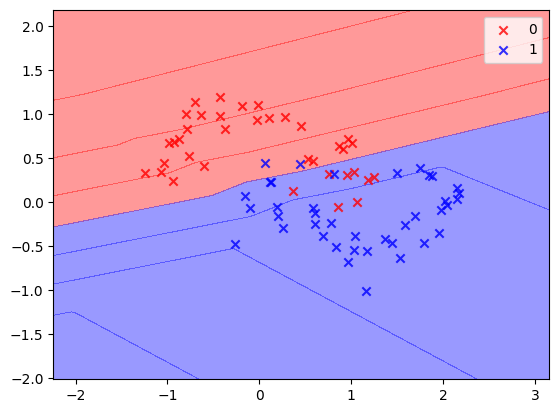

In [173]:
from utils.plots import plot_decision_regions

plot_decision_regions(X_test, y_test, model)

😥 It looks like we are **underfitting** a bit, right? 

😁 We can try :
- to train the model a bit longer...
- ...or maybe to create a Deeper Neural network in the next section!

## (5) Training your Neural Network with more epochs

❓ Re-train the model for 500 iterations ❓
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learned on the previous _.fit()_ ...!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [174]:
model = initialize_model()

In [175]:
history = model.fit(X_train, y_train, epochs=500)

Epoch 1/500
6/6 [==============================] - 0s 1ms/step - loss: 0.7847 - accuracy: 0.4914
Epoch 2/500
6/6 [==============================] - 0s 1ms/step - loss: 0.7776 - accuracy: 0.4857
Epoch 3/500
6/6 [==============================] - 0s 1ms/step - loss: 0.7715 - accuracy: 0.4971
Epoch 4/500
6/6 [==============================] - 0s 1ms/step - loss: 0.7651 - accuracy: 0.4971
Epoch 5/500
6/6 [==============================] - 0s 1ms/step - loss: 0.7587 - accuracy: 0.4914
Epoch 6/500
6/6 [==============================] - 0s 1ms/step - loss: 0.7529 - accuracy: 0.4914
Epoch 7/500
6/6 [==============================] - 0s 1ms/step - loss: 0.7468 - accuracy: 0.4971
Epoch 8/500
6/6 [==============================] - 0s 1ms/step - loss: 0.7410 - accuracy: 0.5086
Epoch 9/500
6/6 [==============================] - 0s 1ms/step - loss: 0.7357 - accuracy: 0.5086
Epoch 10/500
6/6 [==============================] - 0s 1ms/step - loss: 0.7301 - accuracy: 0.5143
Epoch 11/500
6/6 [===========

6/6 [==============================] - 0s 997us/step - loss: 0.4758 - accuracy: 0.7829
Epoch 85/500
6/6 [==============================] - 0s 1ms/step - loss: 0.4738 - accuracy: 0.7886
Epoch 86/500
6/6 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.7886
Epoch 87/500
6/6 [==============================] - 0s 958us/step - loss: 0.4701 - accuracy: 0.7886
Epoch 88/500
6/6 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.7886
Epoch 89/500
6/6 [==============================] - 0s 950us/step - loss: 0.4664 - accuracy: 0.7886
Epoch 90/500
6/6 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.7886
Epoch 91/500
6/6 [==============================] - 0s 968us/step - loss: 0.4629 - accuracy: 0.7886
Epoch 92/500
6/6 [==============================] - 0s 1ms/step - loss: 0.4613 - accuracy: 0.7886
Epoch 93/500
6/6 [==============================] - 0s 977us/step - loss: 0.4596 - accuracy: 0.7943
Epoch 94/500
6/6 [=====

6/6 [==============================] - 0s 1ms/step - loss: 0.3869 - accuracy: 0.8171
Epoch 167/500
6/6 [==============================] - 0s 922us/step - loss: 0.3863 - accuracy: 0.8171
Epoch 168/500
6/6 [==============================] - 0s 1ms/step - loss: 0.3857 - accuracy: 0.8171
Epoch 169/500
6/6 [==============================] - 0s 984us/step - loss: 0.3851 - accuracy: 0.8171
Epoch 170/500
6/6 [==============================] - 0s 1ms/step - loss: 0.3844 - accuracy: 0.8171
Epoch 171/500
6/6 [==============================] - 0s 1ms/step - loss: 0.3839 - accuracy: 0.8171
Epoch 172/500
6/6 [==============================] - 0s 1ms/step - loss: 0.3833 - accuracy: 0.8171
Epoch 173/500
6/6 [==============================] - 0s 1ms/step - loss: 0.3827 - accuracy: 0.8171
Epoch 174/500
6/6 [==============================] - 0s 1ms/step - loss: 0.3821 - accuracy: 0.8171
Epoch 175/500
6/6 [==============================] - 0s 1ms/step - loss: 0.3815 - accuracy: 0.8171
Epoch 176/500
6/6 [=

6/6 [==============================] - 0s 1ms/step - loss: 0.3470 - accuracy: 0.8343
Epoch 249/500
6/6 [==============================] - 0s 1ms/step - loss: 0.3466 - accuracy: 0.8343
Epoch 250/500
6/6 [==============================] - 0s 1ms/step - loss: 0.3462 - accuracy: 0.8343
Epoch 251/500
6/6 [==============================] - 0s 1ms/step - loss: 0.3457 - accuracy: 0.8343
Epoch 252/500
6/6 [==============================] - 0s 910us/step - loss: 0.3453 - accuracy: 0.8343
Epoch 253/500
6/6 [==============================] - 0s 1ms/step - loss: 0.3449 - accuracy: 0.8343
Epoch 254/500
6/6 [==============================] - 0s 899us/step - loss: 0.3445 - accuracy: 0.8343
Epoch 255/500
6/6 [==============================] - 0s 1ms/step - loss: 0.3441 - accuracy: 0.8343
Epoch 256/500
6/6 [==============================] - 0s 934us/step - loss: 0.3437 - accuracy: 0.8343
Epoch 257/500
6/6 [==============================] - 0s 1ms/step - loss: 0.3433 - accuracy: 0.8343
Epoch 258/500
6/6 

6/6 [==============================] - 0s 1ms/step - loss: 0.3160 - accuracy: 0.8457
Epoch 331/500
6/6 [==============================] - 0s 871us/step - loss: 0.3156 - accuracy: 0.8457
Epoch 332/500
6/6 [==============================] - 0s 1ms/step - loss: 0.3154 - accuracy: 0.8457
Epoch 333/500
6/6 [==============================] - 0s 931us/step - loss: 0.3149 - accuracy: 0.8457
Epoch 334/500
6/6 [==============================] - 0s 1ms/step - loss: 0.3146 - accuracy: 0.8457
Epoch 335/500
6/6 [==============================] - 0s 880us/step - loss: 0.3143 - accuracy: 0.8457
Epoch 336/500
6/6 [==============================] - 0s 1ms/step - loss: 0.3140 - accuracy: 0.8514
Epoch 337/500
6/6 [==============================] - 0s 915us/step - loss: 0.3136 - accuracy: 0.8514
Epoch 338/500
6/6 [==============================] - 0s 1ms/step - loss: 0.3133 - accuracy: 0.8514
Epoch 339/500
6/6 [==============================] - 0s 979us/step - loss: 0.3129 - accuracy: 0.8514
Epoch 340/500


6/6 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 0.8571
Epoch 413/500
6/6 [==============================] - 0s 900us/step - loss: 0.2862 - accuracy: 0.8571
Epoch 414/500
6/6 [==============================] - 0s 1ms/step - loss: 0.2859 - accuracy: 0.8571
Epoch 415/500
6/6 [==============================] - 0s 924us/step - loss: 0.2853 - accuracy: 0.8629
Epoch 416/500
6/6 [==============================] - 0s 1ms/step - loss: 0.2848 - accuracy: 0.8629
Epoch 417/500
6/6 [==============================] - 0s 847us/step - loss: 0.2844 - accuracy: 0.8629
Epoch 418/500
6/6 [==============================] - 0s 1ms/step - loss: 0.2839 - accuracy: 0.8629
Epoch 419/500
6/6 [==============================] - 0s 960us/step - loss: 0.2834 - accuracy: 0.8629
Epoch 420/500
6/6 [==============================] - 0s 1ms/step - loss: 0.2829 - accuracy: 0.8629
Epoch 421/500
6/6 [==============================] - 0s 922us/step - loss: 0.2824 - accuracy: 0.8686
Epoch 422/500


6/6 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.8800
Epoch 495/500
6/6 [==============================] - 0s 959us/step - loss: 0.2603 - accuracy: 0.8800
Epoch 496/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2601 - accuracy: 0.8800
Epoch 497/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2599 - accuracy: 0.8800
Epoch 498/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2598 - accuracy: 0.8800
Epoch 499/500
6/6 [==============================] - 0s 1ms/step - loss: 0.2596 - accuracy: 0.8857
Epoch 500/500
6/6 [==============================] - 0s 1ms/step - loss: 0.2594 - accuracy: 0.8914


❓ Did the test accuracy improve? ❓

In [176]:
results2 = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.8667


<details>
    <summary><i>Not really... explanations here</i></summary>

* The accuracy did not increase by training the model with more epochs...
* So when should have we stopped the training of this Deep Learning Model?
    * Answer in the next chapter <b><i>Deep Learning - Optimizers, Loss and Fitting</i></b>
    
</details>

## (6) A Deeper Deep Learning Model

❓ Let's try a **deeper** architecture that includes the following layers:

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suitable for this problem ❓


In [177]:
model = initialize_model()

In [185]:
def initialize_model_2():
    
    #############################
    #  1 - Model architecture   #
    #############################   
    

    model = models.Sequential()
    model.add(layers.Dense(20, activation='relu', input_dim=2))
    model.add(layers.Dense(10, activation='relu')) 
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model_2()

❓ What is the number of parameters of your new model ❓

In [186]:
num_parms = (2+1)*20 + (20+1)*10 + (10+1)*5
num_parms

325

❓ Run your model on the previous dataset for 500 epochs and plot the loss afterwards ❓

In [187]:
history3 = model.fit(X_train, y_train, epochs=500)

Epoch 1/500
6/6 [==============================] - 0s 1ms/step - loss: 0.7004 - accuracy: 0.2457
Epoch 2/500
6/6 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.3486
Epoch 3/500
6/6 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.5257
Epoch 4/500
6/6 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.6629
Epoch 5/500
6/6 [==============================] - 0s 1ms/step - loss: 0.6745 - accuracy: 0.8114
Epoch 6/500
6/6 [==============================] - 0s 1ms/step - loss: 0.6670 - accuracy: 0.8343
Epoch 7/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.8343
Epoch 8/500
6/6 [==============================] - 0s 1ms/step - loss: 0.6456 - accuracy: 0.8286
Epoch 9/500
6/6 [==============================] - 0s 1ms/step - loss: 0.6277 - accuracy: 0.8171
Epoch 10/500
6/6 [==============================] - 0s 1ms/step - loss: 0.6095 - accuracy: 0.8171
Epoch 11/500
6/6 [===========

6/6 [==============================] - 0s 1ms/step - loss: 0.2620 - accuracy: 0.8857
Epoch 85/500
6/6 [==============================] - 0s 1ms/step - loss: 0.2597 - accuracy: 0.8914
Epoch 86/500
6/6 [==============================] - 0s 1ms/step - loss: 0.2575 - accuracy: 0.8971
Epoch 87/500
6/6 [==============================] - 0s 1ms/step - loss: 0.2553 - accuracy: 0.9029
Epoch 88/500
6/6 [==============================] - 0s 1ms/step - loss: 0.2533 - accuracy: 0.9029
Epoch 89/500
6/6 [==============================] - 0s 1ms/step - loss: 0.2500 - accuracy: 0.8971
Epoch 90/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.9029
Epoch 91/500
6/6 [==============================] - 0s 1ms/step - loss: 0.2451 - accuracy: 0.9029
Epoch 92/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.9029
Epoch 93/500
6/6 [==============================] - 0s 1ms/step - loss: 0.2396 - accuracy: 0.9086
Epoch 94/500
6/6 [===============

6/6 [==============================] - 0s 1ms/step - loss: 0.1204 - accuracy: 0.9600
Epoch 168/500
6/6 [==============================] - 0s 1ms/step - loss: 0.1202 - accuracy: 0.9600
Epoch 169/500
6/6 [==============================] - 0s 1ms/step - loss: 0.1203 - accuracy: 0.9600
Epoch 170/500
6/6 [==============================] - 0s 1ms/step - loss: 0.1187 - accuracy: 0.9543
Epoch 171/500
6/6 [==============================] - 0s 1ms/step - loss: 0.1178 - accuracy: 0.9600
Epoch 172/500
6/6 [==============================] - 0s 1ms/step - loss: 0.1172 - accuracy: 0.9600
Epoch 173/500
6/6 [==============================] - 0s 1ms/step - loss: 0.1167 - accuracy: 0.9600
Epoch 174/500
6/6 [==============================] - 0s 1ms/step - loss: 0.1165 - accuracy: 0.9600
Epoch 175/500
6/6 [==============================] - 0s 1ms/step - loss: 0.1162 - accuracy: 0.9600
Epoch 176/500
6/6 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 0.9600
Epoch 177/500
6/6 [=====

6/6 [==============================] - 0s 2ms/step - loss: 0.0803 - accuracy: 0.9714
Epoch 250/500
6/6 [==============================] - 0s 997us/step - loss: 0.0799 - accuracy: 0.9714
Epoch 251/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0799 - accuracy: 0.9714
Epoch 252/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0795 - accuracy: 0.9714
Epoch 253/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0786 - accuracy: 0.9714
Epoch 254/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0784 - accuracy: 0.9714
Epoch 255/500
6/6 [==============================] - 0s 997us/step - loss: 0.0784 - accuracy: 0.9714
Epoch 256/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9714
Epoch 257/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9714
Epoch 258/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0777 - accuracy: 0.9771
Epoch 259/500
6/6 [=

6/6 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9829
Epoch 332/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9829
Epoch 333/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0555 - accuracy: 0.9829
Epoch 334/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9829
Epoch 335/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.9829
Epoch 336/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9829
Epoch 337/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9829
Epoch 338/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0550 - accuracy: 0.9829
Epoch 339/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9829
Epoch 340/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9886
Epoch 341/500
6/6 [=====

6/6 [==============================] - 0s 1ms/step - loss: 0.0425 - accuracy: 0.9886
Epoch 414/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0427 - accuracy: 0.9886
Epoch 415/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9886
Epoch 416/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0431 - accuracy: 0.9886
Epoch 417/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0420 - accuracy: 0.9886
Epoch 418/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0424 - accuracy: 0.9886
Epoch 419/500
6/6 [==============================] - 0s 894us/step - loss: 0.0426 - accuracy: 0.9886
Epoch 420/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0422 - accuracy: 0.9886
Epoch 421/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9886
Epoch 422/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0418 - accuracy: 0.9886
Epoch 423/500
6/6 [===

6/6 [==============================] - 0s 1ms/step - loss: 0.0366 - accuracy: 0.9886
Epoch 496/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0364 - accuracy: 0.9886
Epoch 497/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0366 - accuracy: 0.9886
Epoch 498/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0360 - accuracy: 0.9886
Epoch 499/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0363 - accuracy: 0.9886
Epoch 500/500
6/6 [==============================] - 0s 980us/step - loss: 0.0374 - accuracy: 0.9886


❓ What is your accuracy on the test test ? Store it as `accuracy_deep` variable (`float`) ❓

In [188]:
results3 = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.9333


In [189]:
accuracy_deep = results3[1]
accuracy_deep

0.9333333373069763

🧪 **Test your code**

In [190]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/data-your-first-neural-network/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_deeper_model.py::TestDeeperModel::test_accuracy PASSED              [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/deeper_model.pickle

git commit -m 'Completed deeper_model step'

git push origin master



❓ Do you think we are overfitting on the noise ❓ Once again, use the `plot_decision_regions` function to help your intuition.

1787/1787 [==============================] - 3s 2ms/step


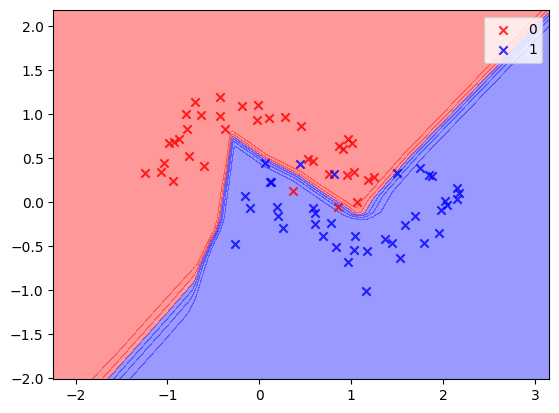

In [193]:
from utils.plots import plot_decision_regions
plot_decision_regions(X_test, y_test, model)

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!